# Naïve Bayes Classifier

## Import the necessary libraires

In [1]:
import pandas as pd
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np

## Read the data

In [2]:
data = pd.read_csv('chirper.csv', encoding = "ISO-8859-1")
data.head()

,Target,IDS,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
data['Target'].value_counts()

1    9500
0     500
Name: Target, dtype: int64

## Define the inputs and the target

Identify the **relevant** columns and declare the variables below.

In [3]:
inputs =data["Text"]
target =data["Target"]

## Split the data into training and tesitng

* Perform a 70:30 split - 30% of the data should be dedicated to testing.
* Set the random state to 365.
* Make sure that there is a fair distribution of the representatives from each class.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3,random_state=365,stratify=target)

## Transform the training and testing inputs using CountVectorizer

In [5]:
vectorizer=CountVectorizer()
x_train_transf=vectorizer.fit_transform(x_train)
x_test_transf=vectorizer.transform(x_test)

## Create a Naïve Bayes model

* Create an instance of the Naïve Bayes class.
* Fit the data to the model.

In [7]:
clf=MultinomialNB()
clf.fit(x_train_transf,y_train)

MultinomialNB()

## Make predictions on the test data

In [8]:
y_test_pred=clf.predict(x_test_transf)

## Create a confusion matrix

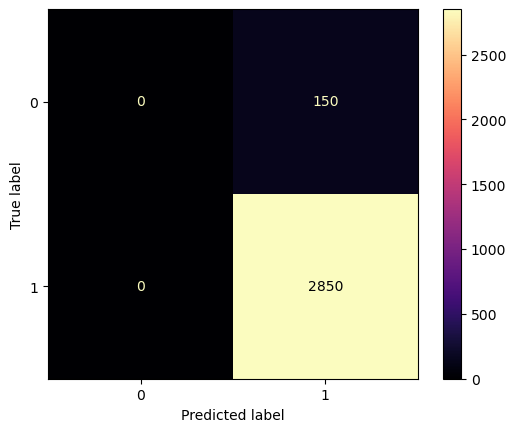

In [9]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,labels=clf.classes_,cmap="magma")

## Print a classification report

* Fill in the parameters necessary for the classification_report() method.
* A parameter **zero_division** has been also added and set to 0.

In [13]:
print(classification_report(y_test,y_test_pred,target_names=["caw","chirps"],
                            zero_division = 0))

              precision    recall  f1-score   support

         caw       0.00      0.00      0.00       150
      chirps       0.95      1.00      0.97      2850

    accuracy                           0.95      3000
   macro avg       0.47      0.50      0.49      3000
weighted avg       0.90      0.95      0.93      3000



In [6]:
clf=ComplementNB()
clf.fit(x_train_transf,y_train)

ComplementNB()

In [7]:
y_test_pred=clf.predict(x_test_transf)

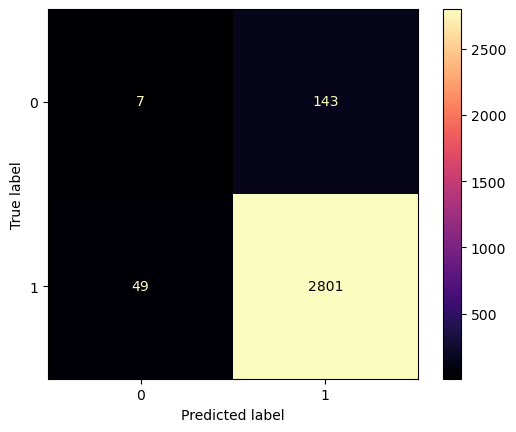

In [8]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,labels=clf.classes_,cmap="magma")

In [9]:
print(classification_report(y_test,y_test_pred,target_names=["caw","chirps"],
                            zero_division = 0))

              precision    recall  f1-score   support

         caw       0.12      0.05      0.07       150
      chirps       0.95      0.98      0.97      2850

    accuracy                           0.94      3000
   macro avg       0.54      0.51      0.52      3000
weighted avg       0.91      0.94      0.92      3000

